In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv('canada_per_capita_income.csv')

In [3]:
data.head()

,year,per capita income (US$)
0,1970,3399.299037
1,1971,3768.297935
2,1972,4251.175484
3,1973,4804.463248
4,1974,5576.514583


In [6]:
# checking the relationship between data is linear or not
# sns.scatterplot(x = 'per capita income (US$)', y = 'year',data = data)
# plt.show()

In [7]:
# checking whether data is having null value or not
# pd.isnull(data)
pd.isnull(data).sum()

year                       0
per capita income (US$)    0
dtype: int64

# Separating feature and target value

In [17]:
X = data.iloc[:,:-1]
# type(X)

In [18]:
Y = data.iloc[:,-1]

# Train-Test Split

In [33]:
import numpy as np
from sklearn.model_selection import train_test_split

In [34]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.20, random_state = 1)

# Building Polynomial Linear Regression Model

In [35]:
from sklearn.linear_model import LinearRegression

In [36]:
model = LinearRegression()

In [37]:
from sklearn.preprocessing import PolynomialFeatures

In [38]:
poly = PolynomialFeatures(degree = 2)

In [39]:
X_train_poly = poly.fit_transform(X_train)

In [40]:
model.fit(X_train_poly, y_train)

LinearRegression()

# Making the prediction

In [41]:
X_test_poly = poly.fit_transform(X_test)

In [42]:
y_pred = model.predict(X_test_poly)

In [43]:
print(y_pred)

[17658.03388916 15942.21795473 34259.97369111 29188.60898735
  5225.86617614  5483.51480202 22459.99023613 25692.53536608
 42745.44905115 19490.97359751]


# Comparison

In [44]:
comparison = pd.DataFrame()

In [45]:
comparison['Actual'] = y_test

In [46]:
comparison['Predicted'] = y_pred

In [47]:
comparison

,Actual,Predicted
24,15755.820270,17658.033889
22,16412.083090,15942.217955
39,32755.176820,34259.973691
35,29198.055690,29188.608987
2,4251.175484,5225.866176
3,4804.463248,5483.514802
29,17581.024140,22459.990236
32,19232.175560,25692.535366
45,35175.188980,42745.449051
26,16699.826680,19490.973598


# Evaluation

In [48]:
from sklearn.metrics import r2_score

In [49]:
r2_score(y_test, y_pred)

0.8615844253647292

# Graph Plottting

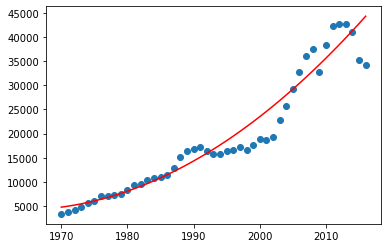

In [50]:
plt.scatter(X,Y)
plt.plot(X,model.predict(poly.fit_transform(X)), color = 'red')
plt.show()